# Lab 2: The Ideal Gas Law
<bk>
Shreya Parjan

9/17/18

### Introduction
PART A: The objective of this lab is to explore the relationship between temperature and volume at constant pressure using the Ideal Gas Law. By collecting data on the expansion of a gas's volume as it is heated, we can quantify the direct relationship between temperature and volume of a gas at constant pressure. We know that the gas will expand when heated at constant pressure because the gas molecules will receive thermal energy and need to occupy a larger volume to maintain pressure.

PART B: The objective of this lab is to explore the relationship between pressure and volume at constant temperature using the Ideal Gas Law. By collecting readings on the pressure of a gas at various volumes, we can quantify the indirect relationship between temperature and volume of a gas at constant pressure. We know that the pressure of a gas will increase when it is confined to a smaller volume because individual gas molecules will be forced closer together while the pressure will decrease when the gas is in a larger volume because the distance between individual molecules will increase on average.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
%matplotlib inline

In [59]:
vFlask = 61 #cm^3
dTubing = 0.3175 #cm
lTubing = 40 #cm
vTubing = (dTubing/2)**2*np.pi*lTubing #cm^3
vInitial = vTubing+vFlask #cm^3
tRoom = 21 #C

temps = np.array([21,22,27,30,31,37,40,44,45,51,52,54,58,64,66,68,72])
deltaV = np.array([0.2,1.0,1.5,1.8,2.0,2.1,2.5,2.8,3.0,3.2,3.5,3.8,4.0,4.2,4.5,4.8,5.0])
vInitialArray = np.array([vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask])
vols = deltaV+vInitialArray

weightedT = temps * (vFlask/vols) + tRoom *((vols-vInitial)/ vols) + tRoom * (vTubing/vols)   

temps2 = np.array([22,27,31,34,39,41,53,60,66,75])
deltaV2 = np.array([0.1,0.5,1.5,2,2.5,3,3.5,4,4.5,5])
vInitialArray2 = np.array([vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask,vTubing+vFlask])
vols2 = deltaV2+vInitialArray2

weightedT2 = temps2 * (vFlask/vols2) + tRoom *((vols2-vInitial)/ vols2) + tRoom * (vTubing/vols2)

print("the uncertainty for the syringe is about +/- .5 cm2")

the uncertainty for the syringe is about +/- .5 cm2


# PART A Constant Pressure
### Assumption 1: the air in the tube and syringe is room temperature

Uncertainties: [0.17309961 0.00379017]
Best-Fit Intercept: 63.02086559029975
Best-Fit Slope: 0.09393339044089977
Absolute Zero (C): -670.9101555314422
Uncertainty: +/- 27.133572798780392


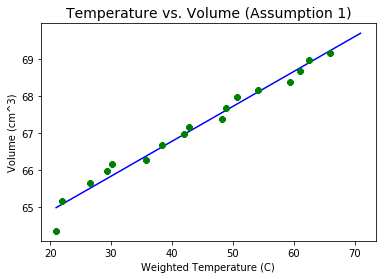

In [60]:
def straight_line_model(x, A, B):
    return A + B * x

popt, pcov = scipy.optimize.curve_fit(straight_line_model, weightedT, vols)
popt_uncertainties = np.sqrt(np.diag(pcov))

print('Uncertainties:', popt_uncertainties)
print('Best-Fit Intercept:', popt[0])
print('Best-Fit Slope:', popt[1])

vol_for_plot = np.linspace(weightedT.min(), weightedT.max()+5, 100)
best_fit_line = straight_line_model(vol_for_plot, popt[0], popt[1])
plt.plot(vol_for_plot, best_fit_line, 'b')


plt.plot(weightedT, vols, 'g8')
plt.xlabel('Weighted Temperature (C)') # label the x-axis
plt.ylabel('Volume (cm^3)') # label the y-axis
plt.title('Temperature vs. Volume (Assumption 1)' , size=14,) # title

abs0 = (-popt[0]/popt[1])
uncert = (((popt_uncertainties[0]/popt[0])**2 + (popt_uncertainties[1]/popt[1])**2)**0.5)*(popt[0]/popt[1])
print('Absolute Zero (C):',abs0)
print('Uncertainty: +/-', uncert)

plt.show()

### Assumption 2: The temp in tubing is avg of room temp and the temp in the flask. The temperature of air in syringe is room temp.

Uncertainties: [0.17315937 0.0036995 ]
Best-Fit Intercept: 63.022689895674624
Best-Fit Slope: 0.09161728082472542
Absolute Zero (C): -687.890857798371
Uncertainty: +/- 27.841183931677346


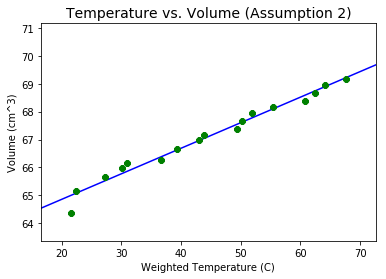

In [61]:
weightedT2 = temps * (vFlask/vols) + tRoom *((vols-vInitial)/ vols) + (tRoom + temps/2) * (vTubing/vols)

popt, pcov = scipy.optimize.curve_fit(straight_line_model, weightedT2, vols)
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('Uncertainties:', popt_uncertainties)
print('Best-Fit Intercept:', popt[0])
print('Best-Fit Slope:', popt[1])
vol_for_plot = np.linspace(-550, weightedT2.max()+5, 100)
best_fit_line = straight_line_model(vol_for_plot, popt[0], popt[1])

#plot data and best fit line

#plotting best fit data
plt.plot(vol_for_plot, best_fit_line, 'b')

#plotting our data
plt.plot(weightedT2, vols, 'g8',)
plt.xlabel('Weighted Temperature (C)') # label the x-axis
plt.ylabel('Volume (cm^3)') # label the y-axis
plt.title('Temperature vs. Volume (Assumption 2)', size=14,) # title
plt.ylim((vols.min()-1, vols.max()+2))
plt.xlim((weightedT2.min()-5, weightedT2.max()+5))

abs0 = (-popt[0]/popt[1])
uncert = (((popt_uncertainties[0]/popt[0])**2 + (popt_uncertainties[1]/popt[1])**2)**0.5)*(popt[0]/popt[1])
print('Absolute Zero (C):',abs0)
print('Uncertainty: +/-', uncert)

plt.show()

Our results were very inaccurate because we estimate absolute zero to be around -680C +/- 30 but our datasets have similar experimental uncertainties so the inaccuracy was likely due to a systematic error.

# PART B Constant Temp

In [62]:
volume = np.array([5,7,8,10,11,13,15,17,20]) #cm^3
pressure = np.array([232.4,158.78,137.55,101.42,88.52,75.67,63.64,58.12,46.26]) #kPa

#volume of air inside pressure sensor
sensorVolume = 0.75 #cm^3

totalVolume = np.ones(9)
for i in range(len(totalVolume)):
    totalVolume[i] = volume[i]+sensorVolume

constant =  2197.067243502151
power =  -1.2846199025368166
uncertainties:  [9.31162963e+01 2.01329832e-02]


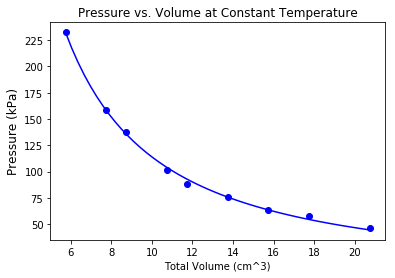

In [63]:
def inverse(x, constant, power):
    return (constant*x**power)

popt, pcov = scipy.optimize.curve_fit(inverse, totalVolume, pressure)
constant = popt[0]
power = popt[1]
print('constant = ',constant)
print('power = ',power)

totalVolume_for_plot = np.linspace(totalVolume.min(), totalVolume.max(), 50)
best_fit_line = inverse(totalVolume_for_plot, popt[0], popt[1])

#calculates uncertainties for both variables
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)

plt.plot(totalVolume, pressure, 'bo') #without '-' after bo, plots points alone
plt.plot(totalVolume_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Total Volume (cm^3)') # label the x-axis
plt.ylabel('Pressure (kPa)', size=12) # label the y-axis

plt.title('Pressure vs. Volume at Constant Temperature') # title
plt.show()

y-intercept =  0.5134896894999148
slope =  2188.82039467241
uncertainties:  [ 1.77505487 32.26209356]


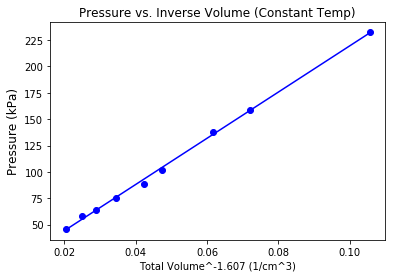

In [64]:
inverseVolume = np.ones(9)
for i in range(len(inverseVolume)):
    inverseVolume[i] = totalVolume[i]**power

def straight_line_model(x, A, B):
    return A + B * x

popt, pcov = scipy.optimize.curve_fit(straight_line_model, inverseVolume, pressure)
yIntercept = popt[0]
slope = popt[1]
print('y-intercept = ',yIntercept)
print('slope = ',slope)

volume_for_plot = np.linspace(inverseVolume.min(), inverseVolume.max(), 50)
best_fit_line = straight_line_model(volume_for_plot, popt[0], popt[1])

#calculates uncertainties for both variables
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)

plt.plot(inverseVolume, pressure, 'bo') #without '-' after bo, plots points alone
plt.plot(volume_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Total Volume^-1.607 (1/cm^3)') # label the x-axis
plt.ylabel('Pressure (kPa)', size=12) # label the y-axis

plt.title('Pressure vs. Inverse Volume (Constant Temp)') # title
plt.show()

Our calculated value for absolute zero greatly differs from the actual value. There could be friction in the syringe or a discrepancy in the approximations for temperature that we made. At a constant temperature volume*pressure is constant.